In [1]:
import keras

Using TensorFlow backend.


In [2]:
import pandas as pd
import numpy as np
import glob

In [3]:
schema_train_3 = {
    'IsBeta': np.int8,
    'RtpStateBitfield': np.int8,
    'IsSxsPassiveMode': np.int8,
    'DefaultBrowsersIdentifier': np.int16,
    'AVProductStatesIdentifier': np.int32,
    'AVProductsInstalled': np.int8,
    'AVProductsEnabled': np.int8,
    'HasTpm': np.int8,
    'CountryIdentifier': np.int16,
    'CityIdentifier': np.int32,
    'OrganizationIdentifier': np.int8,
    'GeoNameIdentifier': np.int16,
    'LocaleEnglishNameIdentifier': np.int16,
    'OsBuild': np.int16,
    'OsSuite': np.int16,
    'IsProtected': np.int8,
    'AutoSampleOptIn': np.int8,
    'SMode': np.int8,
    'IeVerIdentifier': np.int16,
    'Firewall': np.int8,
    'UacLuaenable': np.int32,
    'Census_OEMNameIdentifier': np.int16,
    'Census_OEMModelIdentifier': np.int32,
    'Census_ProcessorCoreCount': np.int16,
    'Census_ProcessorManufacturerIdentifier': np.int8,
    'Census_ProcessorModelIdentifier': np.int16,
    'Census_PrimaryDiskTotalCapacity': np.int32,
    'Census_SystemVolumeTotalCapacity': np.int32,
    'Census_HasOpticalDiskDrive': np.int8,
    'Census_TotalPhysicalRAM': np.int32,
    'Census_InternalPrimaryDiagonalDisplaySizeInInches': np.float16,
    'Census_InternalPrimaryDisplayResolutionHorizontal': np.float16,
    'Census_InternalPrimaryDisplayResolutionVertical': np.int16,
    'Census_InternalBatteryNumberOfCharges': np.int32,
    'Census_OSBuildNumber': np.int16,
    'Census_OSBuildRevision': np.int32,
    'Census_OSInstallLanguageIdentifier': np.int8,
    'Census_OSUILocaleIdentifier': np.int16,
    'Census_IsPortableOperatingSystem': np.int8,
    'Census_IsFlightingInternal': np.int8,
    'Census_IsFlightsDisabled': np.int8,
    'Census_ThresholdOptIn': np.int8,
    'Census_FirmwareManufacturerIdentifier': np.int16,
    'Census_FirmwareVersionIdentifier': np.int32,
    'Census_IsSecureBootEnabled': np.int8,
    'Census_IsWIMBootEnabled': np.int8,
    'Census_IsVirtualDevice': np.int8,
    'Census_IsTouchEnabled': np.int8,
    'Census_IsPenCapable': np.int8,
    'Census_IsAlwaysOnAlwaysConnectedCapable': np.int8,
    'Wdft_IsGamer': np.int8,
    'Wdft_RegionIdentifier': np.int8,
    'HasDetections': np.int8,
    'Census_InternalBatteryType_informed': np.int8,
    'ProductName_index': np.int8,
    'Platform_index': np.int8,
    'Processor_index': np.int8,
    'OsPlatformSubRelease_index': np.int8,
    'OsBuildLab_index': np.int16,
    'SkuEdition_index': np.int8,
    'PuaMode_index': np.int8,
    'SmartScreen_index': np.int8,
    'Census_MDC2FormFactor_index': np.int8,
    'Census_DeviceFamily_index': np.int8,
    'Census_ProcessorClass_index': np.int8,
    'Census_PrimaryDiskTypeName_index': np.int8,
    'Census_ChassisTypeName_index': np.int8,
    'Census_PowerPlatformRoleName_index': np.int8,
    'Census_InternalBatteryType_index': np.int8,
    'Census_OSArchitecture_index': np.int8,
    'Census_OSBranch_index': np.int8,
    'Census_OSEdition_index': np.int8,
    'Census_OSSkuName_index': np.int8,
    'Census_OSInstallTypeName_index': np.int8,
    'Census_OSWUAutoUpdateOptionsName_index': np.int8,
    'Census_GenuineStateName_index': np.int8,
    'Census_ActivationChannel_index': np.int8,
    'Census_FlightRing_index': np.int8,
    'Census_OSVersion_index': np.int16,
    'EngineVersion_index': np.int8,
    'AppVersion_index': np.int8,
    'AvSigVersion_index': np.int16,
    'OsVer_index': np.int8,
    'Census_OSVersion_0_index': np.int8,
    'Census_OSVersion_1_index': np.int16,
    'EngineVersion_0_index': np.int8,
    'EngineVersion_1_index': np.int8,
    'AppVersion_0_index': np.int8,
    'AppVersion_1_index': np.int8,
    'AvSigVersion_0_index': np.int8,
    'AvSigVersion_1_index': np.int16,
    'OsVer_0_index': np.int8,
    'OsVer_1_index': np.int8,
    'OsBuildLab_diff': np.int8,
    'AvSigVersion_diff': np.int16,
    'OSVersion_diff': np.int8,
    'OSBuild_fulldiff': np.int8,
    'AvSigVersion_fulldiff': np.int8,
    'OsBuildLab_difftotal': np.int16,
    'DateAvSigVersion_difftotal': np.int16,
    'DateOSVersion_difftotal': np.int16,
    'DateAvSigVersion_fulldifftotal': np.int8,
    'OsBuildLab_fulldifftotal': np.int8,
    'DateAvSigVersion_ratio': np.float16,
    'OsBuildLab_ratio': np.float16,
    'OSVersion_ratio': np.float16,
    'DateAvSigVersion_fullratio': np.float16,
    'OsBuildLab_fullratio': np.float16,
    'OsBuildLab_dayOfWeek': np.int8,
    'AvSigVersion_dayOfWeek': np.int8,
    'prediction_2': np.int8,
    'prediction_4': np.int8,
    'prediction_8': np.int8,
    'prediction_16': np.int8,
    'prediction_32': np.int8,
    'prediction_64': np.int8,
    'count(DISTINCT AvSigVersion_Name)': np.int16,
    'count(DISTINCT AvSigVersion_Type)': np.int8,
    'count(DISTINCT AvSigVersion_AlertLevel)': np.int8
}

In [4]:

print('Cargando datos del TRAIN')
path = '../../data/train_final_3'
allFiles = glob.glob(path + "/*.csv")
list_ = []
for file_ in allFiles:
    df = pd.read_csv(file_)
    df = (df.fillna(-1)).astype(schema_train_3)
    list_.append(df)

train = pd.concat(list_, axis = 0, ignore_index = True)

sel_cols = [c for c in train.columns if c not in ['MachineIdentifier',
                                                      'HasDetections',
                                                      'Census_DeviceFamily_Windows.Server',
                                                      'Census_DeviceFamily_Windows.Desktop'
                                                     ]]



Cargando datos del TRAIN


In [5]:
X = train.loc[:, sel_cols]
y = train.loc[:,'HasDetections']


In [6]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.5)

In [38]:
print("X_train :"+str(X_train.shape))

print("X_test :"+str(X_test.shape))


print("y_train :"+str(y_train.shape))

print("y_test :"+str(y_test.shape))

X_train :(6691112, 118)
X_test :(2230371, 118)
y_train :(6691112,)
y_test :(2230371,)


In [84]:
from keras.models import Sequential
from keras.layers import Dense,Dropout

# from keras.wrappers.scikit_learn import KerasClassifier
# from sklearn.model_selection import cross_val_score
# from sklearn.preprocessing import LabelEncoder
# from sklearn.model_selection import StratifiedKFold
# from sklearn.preprocessing import StandardScaler
# from sklearn.pipeline import Pipeline

In [6]:
X_train.head()

,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,CityIdentifier,...,AvSigVersion_dayOfWeek,prediction_2,prediction_4,prediction_8,prediction_16,prediction_32,prediction_64,count(DISTINCT AvSigVersion_Name),count(DISTINCT AvSigVersion_Type),count(DISTINCT AvSigVersion_AlertLevel)
0,0,7,0,0,53447,1,1,1,203,-1,...,7,0,0,6,0,0,50,5,2,2
1,0,7,0,0,53447,1,1,1,169,20691,...,5,0,0,0,10,25,49,-1,-1,-1
2,0,7,0,0,53447,1,1,1,57,56452,...,6,0,0,0,12,6,10,-1,-1,-1
3,0,7,0,0,53447,1,1,1,171,151013,...,3,1,1,2,2,2,2,4,2,1
4,0,7,0,0,38993,2,1,1,107,128159,...,6,0,0,0,10,25,46,75,1,2


In [7]:
dimension = X_train.shape[1]

In [ ]:
dimension

In [22]:
from sklearn.metrics import roc_auc_score
import tensorflow as tf

def auroc(y_true, y_pred):
    return tf.py_func(roc_auc_score, (y_true, y_pred), tf.double)

In [87]:
earlyStopping = keras.callbacks.EarlyStopping(monitor='auroc', patience=10, verbose=1, mode='auto')

In [19]:
model = Sequential()
model.add(Dense(10, input_dim=dimension, kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.3,noise_shape=None,seed=None))

model.add(Dense(20, kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.3,noise_shape=None,seed=None))

model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam',metrics = [auroc])

NameError: name 'dimension' is not defined

In [86]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_48 (Dense)             (None, 10)                1190      
_________________________________________________________________
dropout_1 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_49 (Dense)             (None, 20)                220       
_________________________________________________________________
dropout_2 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_50 (Dense)             (None, 1)                 21        
Total params: 1,431
Trainable params: 1,431
Non-trainable params: 0
_________________________________________________________________


In [88]:
model.fit(X_train, y_train,
          epochs=100,
          batch_size=int(X_train.shape[0]/100),
             callbacks=[earlyStopping])

Epoch 1/100
6691112/6691112 [==============================] - 65s 10us/step - loss: 7.4156 - acc: 0.5016 - auroc: 0.5017
Epoch 2/100
6691112/6691112 [==============================] - 66s 10us/step - loss: 1.0992 - acc: 0.5001 - auroc: 0.4999
Epoch 3/100
6691112/6691112 [==============================] - 64s 10us/step - loss: 0.6934 - acc: 0.5003 - auroc: 0.5003
Epoch 4/100
6691112/6691112 [==============================] - 65s 10us/step - loss: 0.6932 - acc: 0.5001 - auroc: 0.5001
Epoch 5/100
6691112/6691112 [==============================] - 64s 10us/step - loss: 0.6932 - acc: 0.4998 - auroc: 0.4999
Epoch 6/100
6691112/6691112 [==============================] - 65s 10us/step - loss: 0.6932 - acc: 0.4995 - auroc: 0.4997
Epoch 7/100
6691112/6691112 [==============================] - 65s 10us/step - loss: 0.6932 - acc: 0.4998 - auroc: 0.5001
Epoch 8/100
6691112/6691112 [==============================] - 65s 10us/step - loss: 0.6932 - acc: 0.4997 - auroc: 0.4997
Epoch 9/100
6691112/6691

KeyboardInterrupt: 

In [75]:
score = model.evaluate(X_test, y_test, batch_size=int(X_train.shape[0]/100),verbose=1)

2230371/2230371 [==============================] - 3s 1us/step


In [76]:
score

[0.7124060682167555, 0.5459441489130739, 0.5609412525892398]

# Red neuronal Kaggle

In [8]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization, Activation
from keras.callbacks import LearningRateScheduler
from keras.optimizers import Adam

# #SPLIT TRAIN AND VALIDATION SET
# X_train, X_val, Y_train, Y_val = train_test_split(
#     df_train[cols], df_train['HasDetections'], test_size = 0.5)




In [20]:
# BUILD MODEL
model = Sequential()
model.add(Dense(100,input_dim=X_train.shape[1]))
model.add(Dropout(0.4))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(100))
model.add(Dropout(0.4))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=Adam(lr=0.01), loss="binary_crossentropy", metrics=["accuracy"])
annealer = LearningRateScheduler(lambda x: 1e-2 * 0.95 ** x)


In [21]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 100)               11900     
_________________________________________________________________
dropout_3 (Dropout)          (None, 100)               0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 100)               400       
_________________________________________________________________
activation_3 (Activation)    (None, 100)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 100)               10100     
_________________________________________________________________
dropout_4 (Dropout)          (None, 100)               0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 100)               400       
__________

In [11]:
from keras import callbacks
from sklearn.metrics import roc_auc_score

class printAUC(callbacks.Callback):
    def __init__(self, X_train, y_train):
        super(printAUC, self).__init__()
        self.bestAUC = 0
        self.X_train = X_train
        self.y_train = y_train
        
    def on_epoch_end(self, epoch, logs={}):
        pred = self.model.predict(np.array(self.X_train))
        auc = roc_auc_score(self.y_train, pred)
        print("Train AUC: " + str(auc))
        pred = self.model.predict(self.validation_data[0])
        auc = roc_auc_score(self.validation_data[1], pred)
        print ("Validation AUC: " + str(auc))
        if (self.bestAUC < auc) :
            self.bestAUC = auc
            self.model.save("bestNet.h5", overwrite=True)
        return

In [23]:
# TRAIN MODEL
model.fit(X_train,y_train, batch_size=int(X_train.shape[0]/100), epochs = 20, callbacks=[annealer,
          printAUC(X_train, y_train)], validation_data = (X_test,y_test), verbose=1)

# model.fit(X_train,y_train, batch_size=int(X_train.shape[0]/100), epochs = 20, callbacks=[annealer,
#           printAUC(X_train, y_train)], verbose=1)

Train on 4460741 samples, validate on 4460742 samples
Epoch 1/20
4460741/4460741 [==============================] - 68s 15us/step - loss: 0.6809 - acc: 0.5682 - val_loss: 0.6843 - val_acc: 0.5397
Train AUC: 0.5956970567859148
Validation AUC: 0.5958255691362411
Epoch 2/20
4460741/4460741 [==============================] - 130s 29us/step - loss: 0.6796 - acc: 0.5713 - val_loss: 0.6826 - val_acc: 0.5458
Train AUC: 0.594784387193786
Validation AUC: 0.594925299695099
Epoch 3/20
4460741/4460741 [==============================] - 67s 15us/step - loss: 0.6795 - acc: 0.5714 - val_loss: 0.6830 - val_acc: 0.5445
Train AUC: 0.5950191573938716
Validation AUC: 0.5952047500529727
Epoch 4/20
4460741/4460741 [==============================] - 105s 23us/step - loss: 0.6790 - acc: 0.5728 - val_loss: 0.6840 - val_acc: 0.5395
Train AUC: 0.5948202387306923
Validation AUC: 0.5950327624329301
Epoch 5/20
4460741/4460741 [==============================] - 78s 18us/step - loss: 0.6786 - acc: 0.5736 - val_loss: 0

In [ ]:
del model

In [17]:
import gc
gc.collect()

172

In [24]:
import matplotlib.pyplot as plt

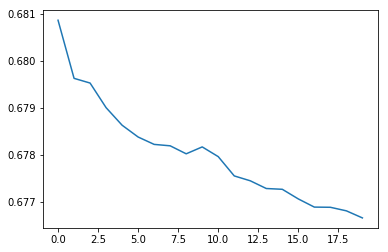

In [26]:
plt.plot(model.history.history['loss'])


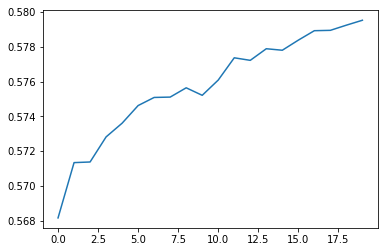

In [27]:
plt.plot(model.history.history['acc'])

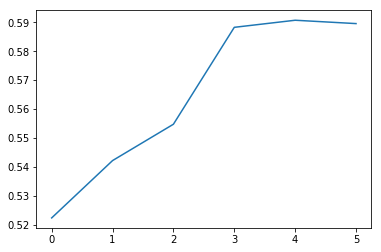

In [79]:
plt.plot(model.history.history['auroc'])

In [25]:
model.history.history

{'val_loss': [0.6843234276317193,
  0.6826109383471584,
  0.6829694760439057,
  0.6840158297844773,
  0.6841751044806986,
  0.6835528519933104,
  0.6828900179575517,
  0.6830915296874657,
  0.6837636280998183,
  0.6834728934888449,
  0.6840065924063005,
  0.6842207179420167,
  0.6839192265302902,
  0.6833632579576804,
  0.6836717434580455,
  0.6848767570293103,
  0.6841998931618027,
  0.6847377493850373,
  0.6845161013316582,
  0.6835566447970488],
 'val_acc': [0.5397043814392395,
  0.5457522534244513,
  0.5444845233756953,
  0.5395476823701186,
  0.5394326763574545,
  0.541355002160437,
  0.5446869580499699,
  0.5439153390811421,
  0.5410164963314493,
  0.542307538066747,
  0.5404313886728044,
  0.539146850339065,
  0.5407389600490026,
  0.5421118268662651,
  0.5414594720924147,
  0.5369440754020717,
  0.5393022071908069,
  0.5365145498986046,
  0.5380320137718602,
  0.5420154315660717],
 'loss': [0.6808574984914759,
  0.6796234638488763,
  0.6795235870614722,
  0.6790006405730208,
  

In [ ]:
model.predict_proba(X_test)

## Prediction

In [28]:
print('Cargando datos del TEST')
path = '../../data/test_final_3'
allFiles = glob.glob(path + "/*.csv")
list_ = []
for file_ in allFiles:
    df = pd.read_csv(file_)
    df = (df.fillna(-1)).astype(schema_train_3)
    list_.append(df)


test = pd.concat(list_, axis = 0, ignore_index = True).fillna(-1)

sel_cols = [c for c in test.columns if c not in ['MachineIdentifier',
                                                 'HasDetections',
                                                 'Census_DeviceFamily_Windows.Server',
                                                 'Census_DeviceFamily_Windows.Desktop'
                                                 ]
            ]

X_test = test.loc[:, sel_cols]

Cargando datos del TEST


In [29]:
predictions = model.predict(X_test)

In [30]:
predictions

array([[0.44171727],
       [0.55441296],
       [0.43175006],
       ...,
       [0.42705053],
       [0.38649637],
       [0.46251813]], dtype=float32)

In [42]:
predf= pd.DataFrame(predictions,columns=['HasDetections'])

In [52]:
pd.concat([X_machines,predf],axis=1).to_csv('keras_model.csv', index=None)

In [31]:
X_machines = test.loc[:, 'MachineIdentifier']


df_prds = pd.DataFrame({'MachineIdentifier': X_machines, 'HasDetections': predictions})

df_prds.to_csv('keras_model.csv', index=None)

Exception: Data must be 1-dimensional

In [104]:
del predictions

### Save train in one file

In [25]:
train.to_csv("train_uniq.csv")